In [1]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

In [4]:

# Dataset load کرنا
df = pd.read_csv("/kaggle/input/credit-dataset/credit_scoring_dataset.csv")

# ڈیٹا دیکھنے کے لیے
df.head()

,income,debt,num_credit_cards,payment_history_score,age,creditworthy
0,67450.71230,29194.84349,3,799,55,0
1,57926.03548,25397.06946,3,654,28,0
2,69715.32807,18477.04296,3,784,44,1
3,82845.44785,12824.50578,4,510,39,0
4,56487.69938,23585.78651,5,343,56,0


In [5]:
# 3. Feature Engineering
df['debt_to_income_ratio'] = df['debt'] / df['income']



In [6]:
# 4. Split Features and Target
X = df.drop(columns='creditworthy')
y = df['creditworthy']

In [7]:
# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 7. Initialize Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [10]:
# 8. Train, Predict, and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print("-" * 40)
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       140
           1       0.85      0.78      0.82        60

    accuracy                           0.90       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.89      0.90      0.89       200

ROC-AUC Score: 0.9599
----------------------------------------
=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC-AUC Score: 1.0000
----------------------------------------
=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      

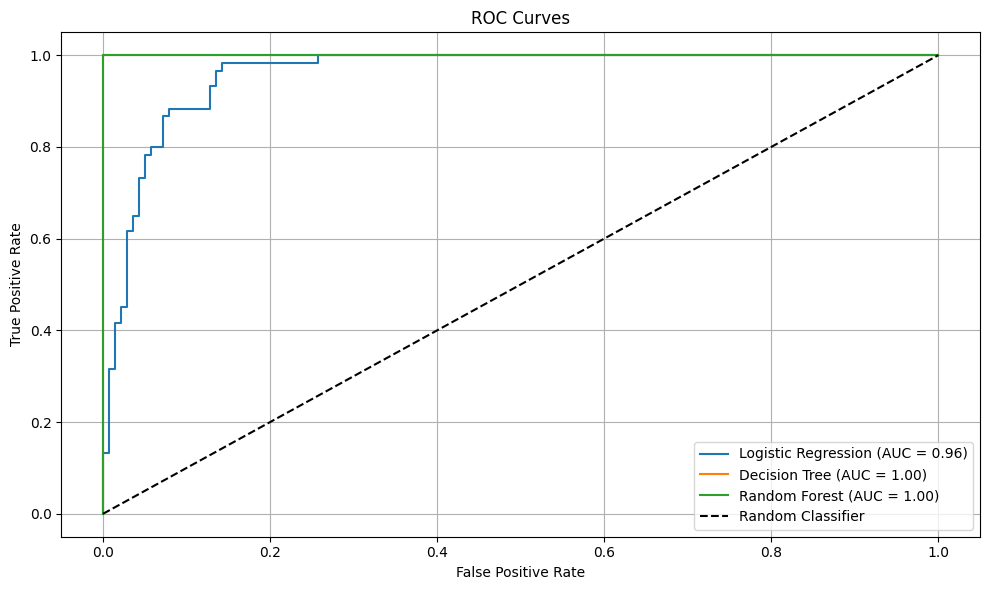

In [11]:
# 9. Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, res['y_prob']):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

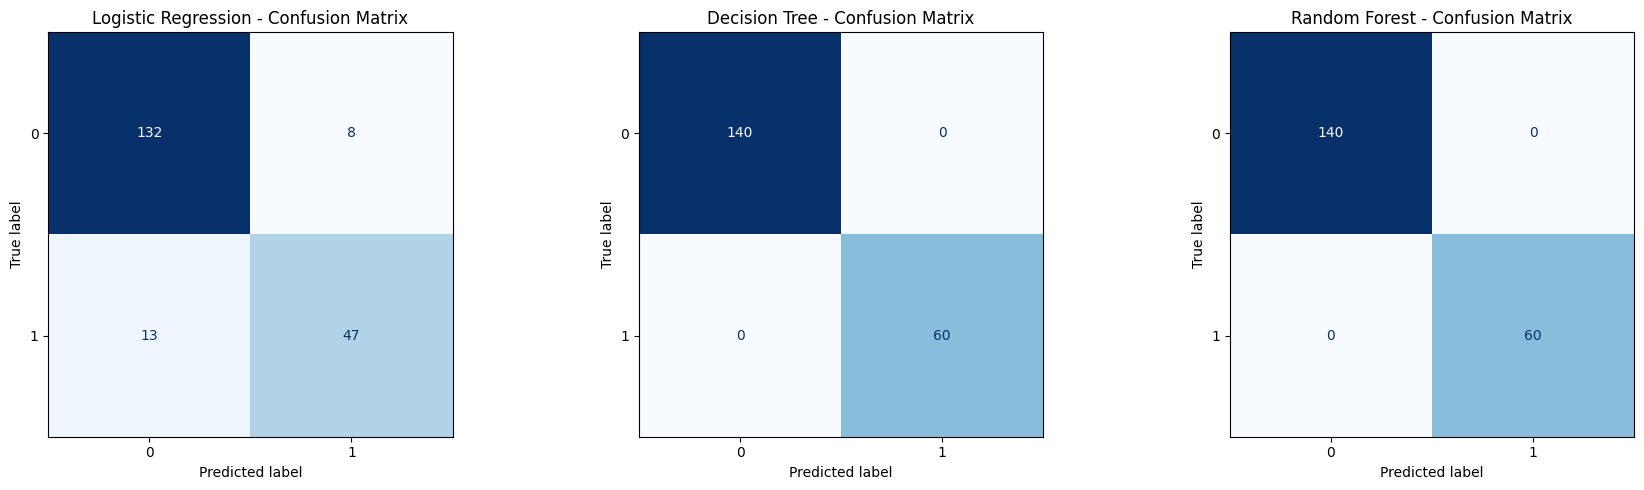

In [12]:
# 10. Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'{name} - Confusion Matrix')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


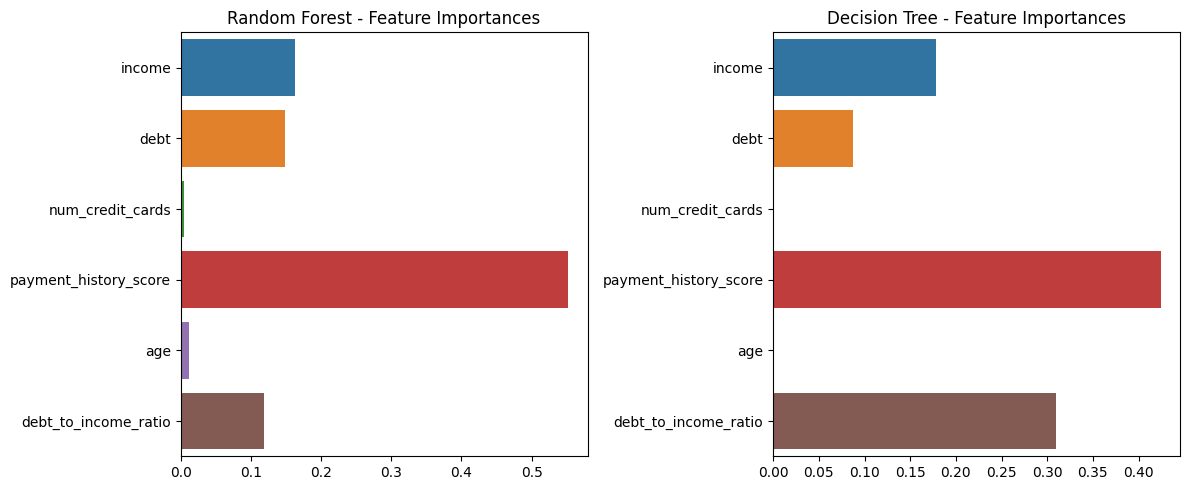

In [14]:
# 11. Feature Importance (Tree Models)
feature_names = X.columns.tolist()

plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(1, 2, 1)
sns.barplot(x=models['Random Forest'].feature_importances_, y=feature_names)
plt.title("Random Forest - Feature Importances")

# Decision Tree
plt.subplot(1, 2, 2)
sns.barplot(x=models['Decision Tree'].feature_importances_, y=feature_names)
plt.title("Decision Tree - Feature Importances")

plt.tight_layout()
plt.show()